In [21]:
import numpy as np



d_1 = [1,3,0,0,2,2]
d_2 = [2,3,3,2,2]
d_3 = [2,3,3,4,0]
d_4 = [0,3,1,4,2]
d_5 = [1,0,1,2]
d_6 = [1,3,1]
d_7 = [1,1]
d_8 = [4,1]
d_9 = []





In [22]:
x1=np.mean(np.square(d_1))
x2=np.mean(np.square(d_2))
x3=np.mean(np.square(d_3))
x4=np.mean(np.square(d_4))
x5=np.mean(np.square(d_5))
x6=np.mean(np.square(d_6))
x7=np.mean(np.square(d_7))
x8=np.mean(np.square(d_8))

print(x1, x2,x3,x4,x5,x6,x7,x8)

3.0 6.0 7.6 6.0 1.5 3.6666666666666665 1.0 8.5


$\gamma\left(h\right)=\frac{1}{N(h)}\sum{(Z(x)+Z(x+h))^2}$

## Chapitre 2 : Les pacquets


quoting code :
    ```import numpy as np```

In [1]:
import numpy as np
mesure = np.array([2,1,4,4,np.nan,1,1,3,np.nan,5,3])

h=1
samples=[]
while h<mesure.size:
    for i in range(mesure.size-2):
        sample = mesure[i:i+h+1:h]
    h+=1
    
                  

In [43]:
import numpy as np
mesure = np.array([2,1,4,4,np.nan,1,1,3,np.nan,5,3])

samples = []
h=1
while h<mesure.size:
    sqdiff = np.square(mesure[:-h]-mesure[h:])
    samples.append([h,np.mean(sqdiff[~np.isnan(sqdiff)])/2])
    h+=1
print(samples)


[[1, 1.5], [2, 3.0], [3, 3.8], [4, 3.0], [5, 0.75], [6, 1.0], [7, 0.5], [8, 4.25], [9, 3.25], [10, 0.5]]


In [44]:
mesure = np.array([2,1,4,4,np.nan,1,1,3,np.nan,5,3])
h=8
sqdiff = np.square(mesure[:-h]-mesure[h:])
sqdiff = sqdiff[~np.isnan(sqdiff)]
moyenne = np.mean(sqdiff)/2

print(moyenne)

4.25


In [61]:
# Variogramme 1D
def variogram_1D(mesure, h):
    sqdiff = np.square(mesure[:-h]-mesure[h:])
    sqdiff = sqdiff[~np.isnan(sqdiff)] #filtrage nan
    moyenne = np.mean(sqdiff)/2
    N = len(sqdiff)
    return moyenne, N
    

mesure = np.array([2,1,4,4,np.nan,1,1,3,np.nan,5,3])

for h in range(1,mesure.size):
    gamma = variogram_1D(mesure, h)[0]
    print(h, gamma)



1 1.5
2 3.0
3 3.8
4 3.0
5 0.75
6 1.0
7 0.5
8 4.25
9 3.25
10 0.5


In [63]:
h = np.arange(1,10)
gamma = [variogram_1D(mesure, h_i)[0] for h_i in h]
N_h = [variogram_1D(mesure, h_i)[1] for h_i in h]
print(gamma, N_h)

[1.5, 3.0, 3.8, 3.0, 0.75, 1.0, 0.5, 4.25, 3.25] [6, 5, 5, 5, 4, 3, 3, 2, 2]


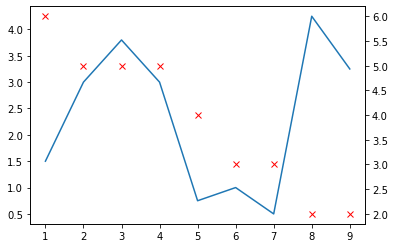

In [69]:
import matplotlib.pyplot as plt
plt.plot(h, gamma)
axis2= plt.twinx()
axis2.plot(h,N_h, 'rx')
plt.show()

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("2D.csv", sep=";")

#data = data.drop(columns=["ID"])
plt.scatter(data["X"].values, data["Y"].values, c=data["Z"])
plt.colorbar()
plt.gca().set_aspect("equal")



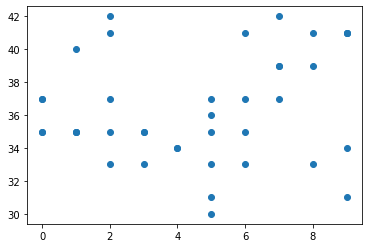

In [96]:
plt.plot(data["X"], data["Z"], "o")

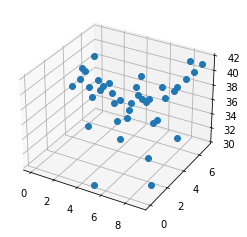

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data["X"],data["Y"],data["Z"], 'o')
plt.show()

In [2]:
data["Z"].describe() # description stat rapide des données

NameError: name 'data' is not defined

# Geostat avec packages

In [9]:
import skgstat as skg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\alexc\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 50.635896983152705,
 'normalized_sill': 149.7899946446453,
 'normalized_nugget': 0,
 'effective_range': 4.681290332099215,
 'sill': 11.704398176798449,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': None,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

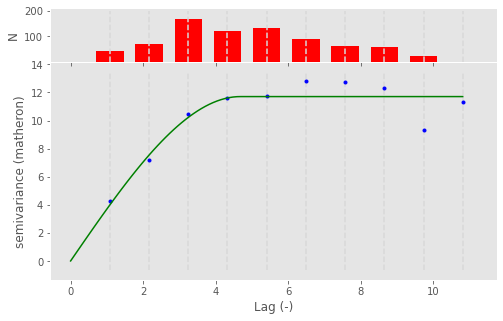

In [16]:
data = pd.read_csv("2D.csv", sep=";")

plt.style.use('ggplot')
Vario = skg.Variogram(data[['X','Y']], data["Z"])
Vario.plot()
Vario.describe()

# Interpolation

In [40]:
Kri = skg.OrdinaryKriging(Vario, min_points=5)
xx,yy = np.mgrid[0:9:100j, 0:7:100j]
xx = xx.flatten()
yy = yy.flatten()
zz = Kri.transform(xx,yy)
zz_err = Kri.sigma

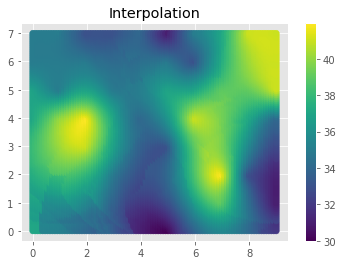

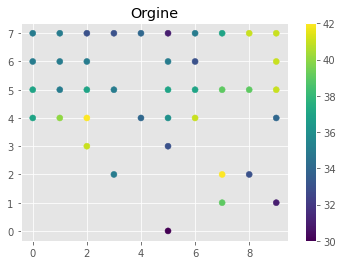

In [43]:
plt.scatter(xx,yy,c=zz)
plt.title("Interpolation")
plt.colorbar()
plt.show()

plt.scatter(data["X"], data['Y'], c=data['Z'])
plt.title("Orgine")
plt.colorbar()
plt.show()

plt.scatter(xx,yy,c=zz_err)
plt.title("Erreur")
plt.colorbar()
plt.show()